In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding data

In [81]:
dif1 = pd.read_csv(r"G:\python files\linear REgression assignment\day.csv")
dif1

instant      dteday  season  yr  mnth  holiday  weekday  workingday   
0          1  01-01-2018       1   0     1        0        1           1  \
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered   
0             2  14.110847  18.18125  80.5833  10.749882     331         654  \
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [82]:
dif1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday   
0        1  01-01-2018       1   0     1        0        1           1  \
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered   
0           2  14.110847  18.18125  80.5833  10.749882     331         654  \
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [83]:
dif1.shape


(730, 16)

In [84]:
dif1.describe()

instant      season          yr        mnth     holiday     weekday   
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  \
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed   
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  \
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [85]:
dif1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [86]:
dif1.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

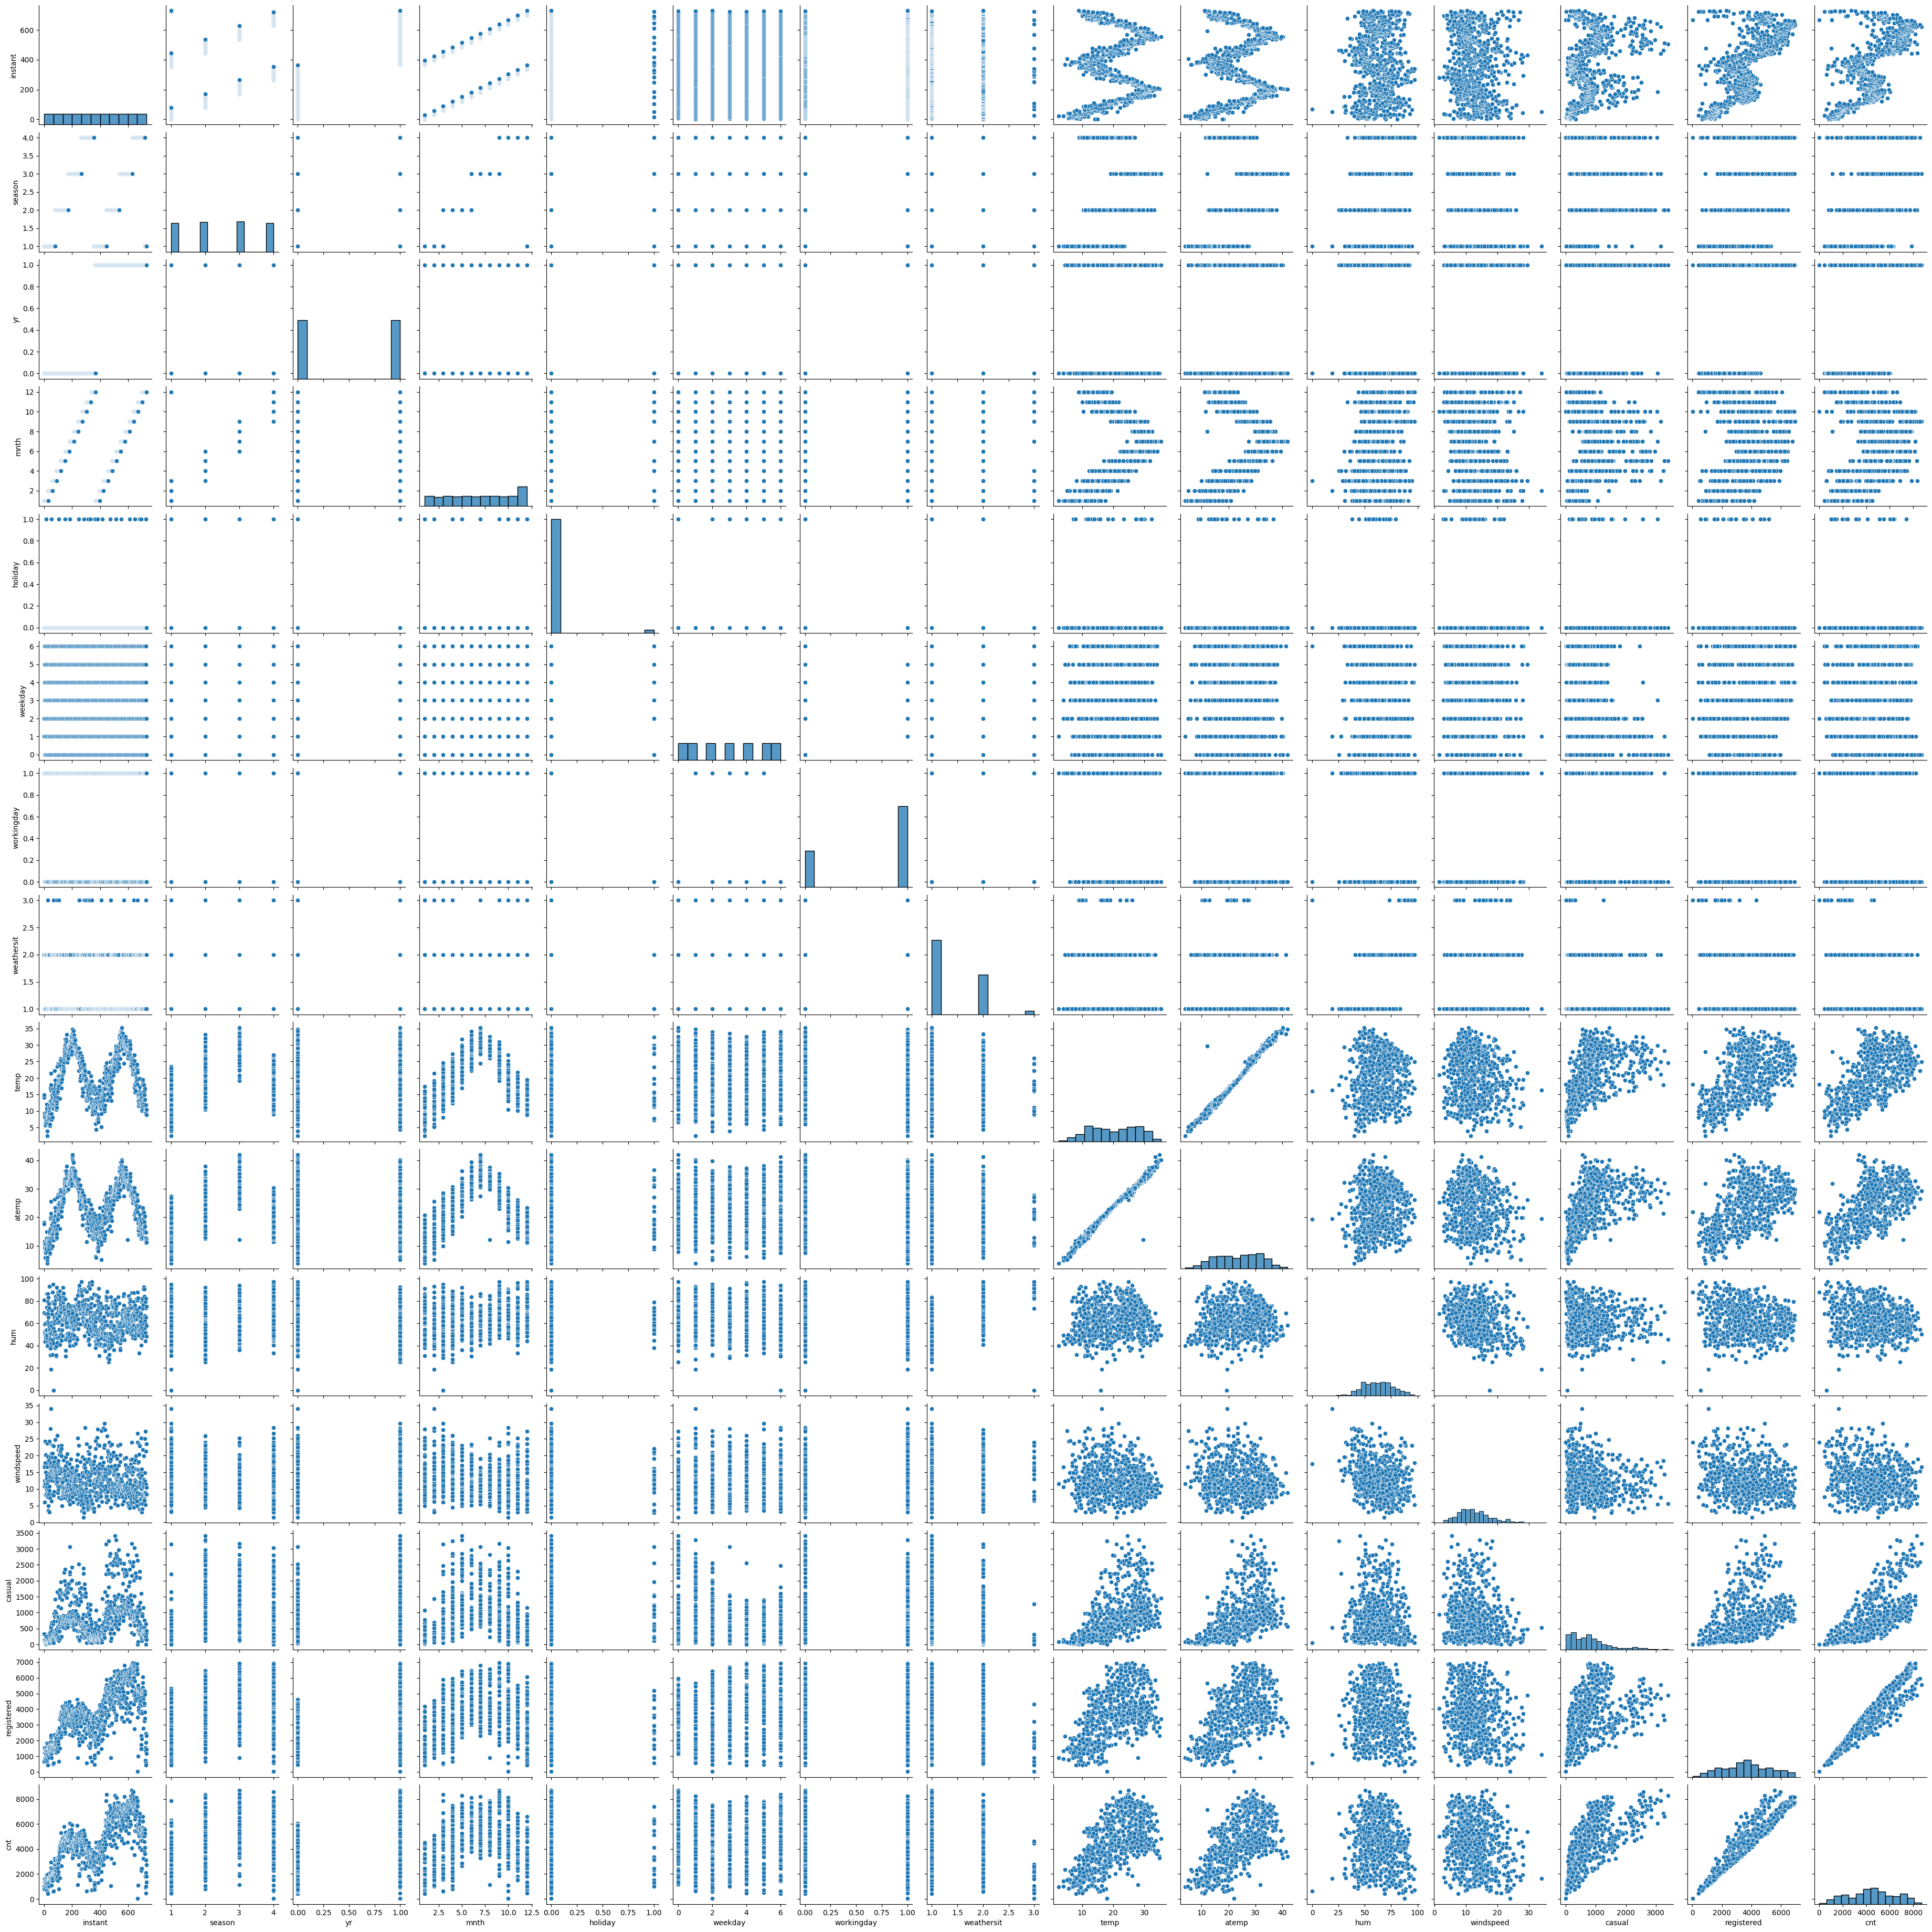

In [87]:
##visualizing the numeric variables 
sns.pairplot(dif1)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

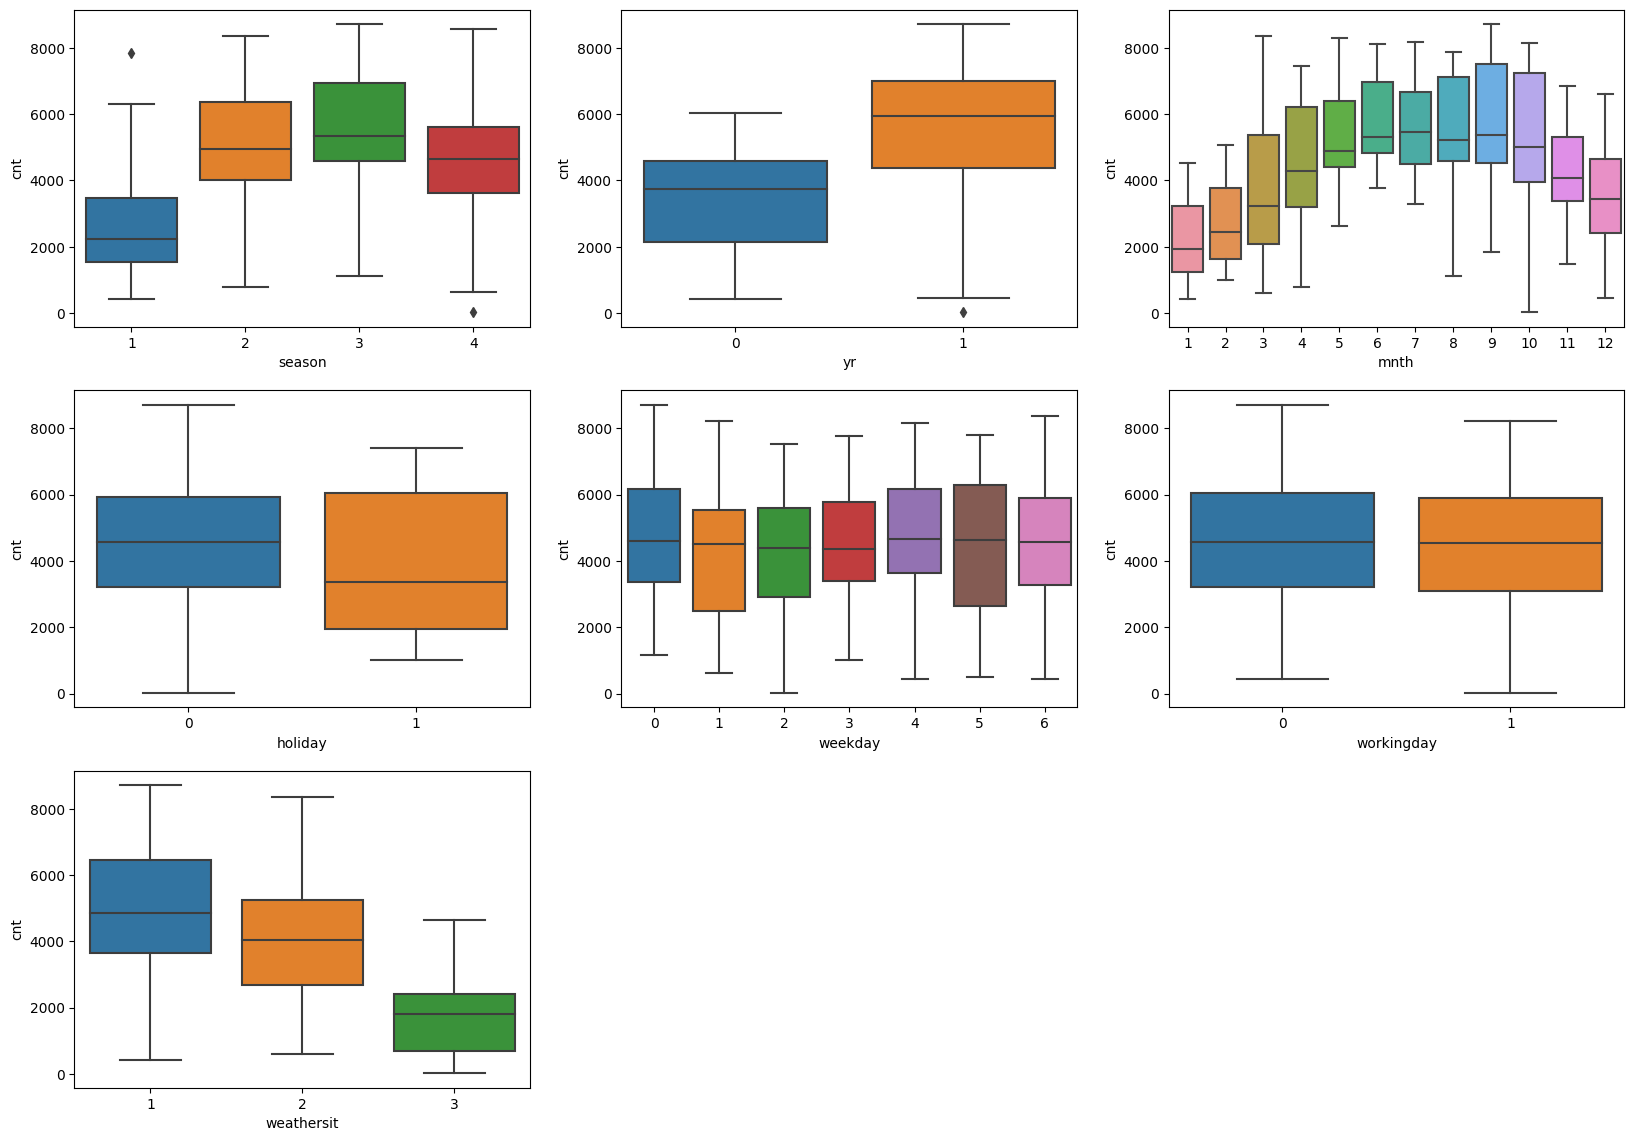

In [88]:
##cnt is our target variable

plt.figure(figsize=(20, 14)) ##height -20 and width-14
plt.subplot(3,3,1) ##(row,column,no)
sns.boxplot(x='season', y='cnt', data=dif1)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y='cnt', data = dif1)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y= 'cnt', data = dif1)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y="cnt", data = dif1)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y= "cnt", data = dif1)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y= 'cnt', data = dif1)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dif1)


In [89]:
## add a dummy variable 
##Pandas to_datetime() method helps to convert string Date time into Python Date time object.
dif1['how_old'] = (pd.to_datetime(dif1['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [90]:
dif1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday   
0        1  01-01-2018       1   0     1        0        1           1  \
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered   
0           2  14.110847  18.18125  80.5833  10.749882     331         654  \
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  how_old  
0   985        0  
1   801        1  
2  1349        2  
3  1562        3  
4  1600        4

In [91]:
## Instance has just serial numbers
##dteday is not useful for us, as we have other date features like date, month, and yr.


In [92]:
dif1.drop(['instant'], axis = 1, inplace = True)

In [93]:
dif1.drop(['dteday'], axis = 1, inplace = True)

In [94]:
dif1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp   
0       1   0     1        0        1           1           2  14.110847  \
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  how_old  
0  18.18125  80.5833  10.749882     331         654   985        0  
1  17.68695  69.6087  16.652113     131         670   801        1  
2   9.47025  43.7273  16.636703     120        1229  1349        2  
3  10.60610  59.0435  10.739832     108        1454  1562        3  
4  11.46350  43.6957  12.522300      82        1518  1600        4

In [95]:
dif1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp   
0       1   0     1        0        1           1           2  14.110847  \
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  how_old  
0  18.18125  80.5833  10.749882     331         654   985        0  
1  17.68695  69.6087  16.652113     131         670   801        1  
2   9.47025  43.7273  16.636703     120        1229  1349        2  
3  10.60610  59.0435  10.739832     108        1454  1562        3  
4  11.46350  43.6957  12.522300      82        1518  1600        4

In [96]:
##as we have 'cnt' that means we dont need casual and registered
## as we know that cnt = casual + registered
dif1.drop(["casual"], axis = 1, inplace = True)
dif1.drop(["registered"], axis = 1, inplace = True)

In [97]:
dif1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp   
0       1   0     1        0        1           1           2  14.110847  \
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  how_old  
0  18.18125  80.5833  10.749882   985        0  
1  17.68695  69.6087  16.652113   801        1  
2   9.47025  43.7273  16.636703  1349        2  
3  10.60610  59.0435  10.739832  1562        3  
4  11.46350  43.6957  12.522300  1600        4

In [98]:
##counting the values

In [99]:
dif1.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [100]:
dif1.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [101]:
dif1.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [102]:
dif1.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [103]:
dif1.cnt.value_counts()

cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: count, Length: 695, dtype: int64

In [104]:
dif1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  how_old     730 non-null    int32  
dtypes: float64(4), int32(1), int64(8)
memory usage: 71.4 KB


In [105]:
dif1.corr()

season            yr          mnth   holiday   weekday   
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868  0.004012  \
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195  0.000685   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   
how_old     4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.001182   

            workingday  weathersit      temp     atemp       hum  windspeed   
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607  \
yr           -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
how_old      -0.015171   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt   how_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.036183 -0.001182  
workingday -0.027640 -0.015171  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
how_old     0.629896  1.000000

In [106]:
##now lets verify missing values , we already know that no null values present in columns but still lets verify it


In [107]:
dif1.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
how_old       0
dtype: int64

In [108]:
##npw lets check for the unique values.
dif1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
how_old       730
dtype: int64

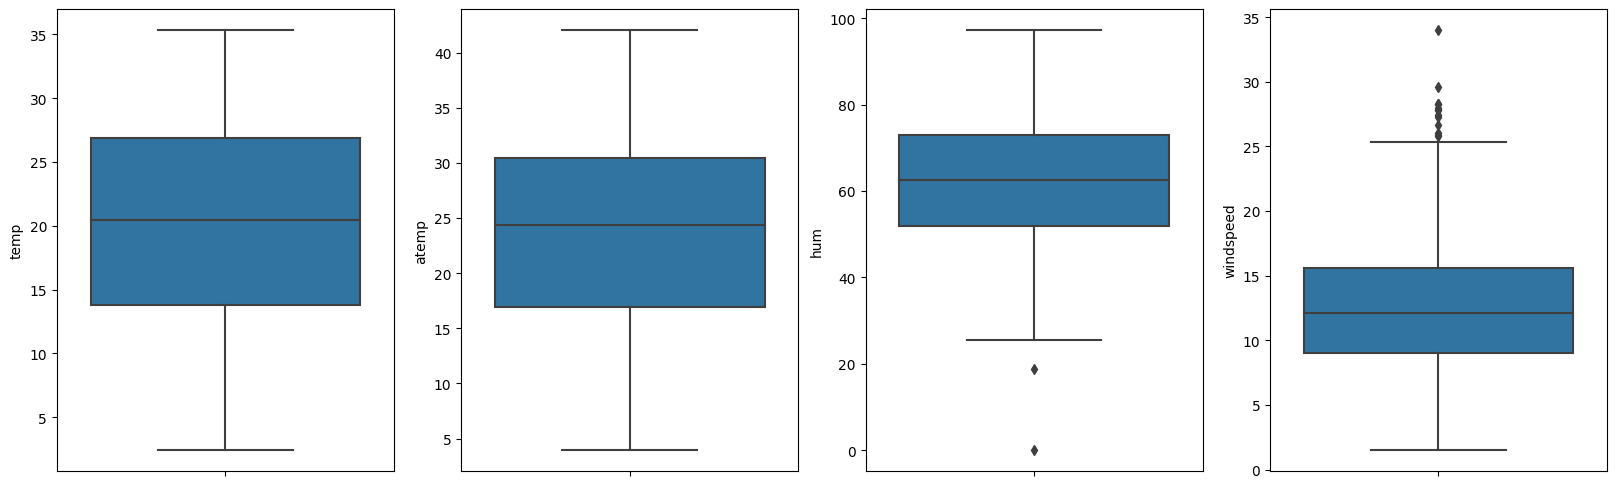

In [109]:
#draw boxplots for the independent variable
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,6))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=dif1)
    i+=1
    
    
##no outliers to be handled.

In [110]:
dif1.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace = True)
dif1.weathersit.replace({1:"good",2:"moderate",3:"bad",4:"severe"},inplace = True)

dif1.head()

season  yr  mnth  holiday  weekday  workingday weathersit       temp   
0  spring   0     1        0        1           1   moderate  14.110847  \
1  spring   0     1        0        2           1   moderate  14.902598   
2  spring   0     1        0        3           1       good   8.050924   
3  spring   0     1        0        4           1       good   8.200000   
4  spring   0     1        0        5           1       good   9.305237   

      atemp      hum  windspeed   cnt  how_old  
0  18.18125  80.5833  10.749882   985        0  
1  17.68695  69.6087  16.652113   801        1  
2   9.47025  43.7273  16.636703  1349        2  
3  10.60610  59.0435  10.739832  1562        3  
4  11.46350  43.6957  12.522300  1600        4

In [111]:
dif1.head()

season  yr  mnth  holiday  weekday  workingday weathersit       temp   
0  spring   0     1        0        1           1   moderate  14.110847  \
1  spring   0     1        0        2           1   moderate  14.902598   
2  spring   0     1        0        3           1       good   8.050924   
3  spring   0     1        0        4           1       good   8.200000   
4  spring   0     1        0        5           1       good   9.305237   

      atemp      hum  windspeed   cnt  how_old  
0  18.18125  80.5833  10.749882   985        0  
1  17.68695  69.6087  16.652113   801        1  
2   9.47025  43.7273  16.636703  1349        2  
3  10.60610  59.0435  10.739832  1562        3  
4  11.46350  43.6957  12.522300  1600        4

<Figure size 1800x3600 with 0 Axes>

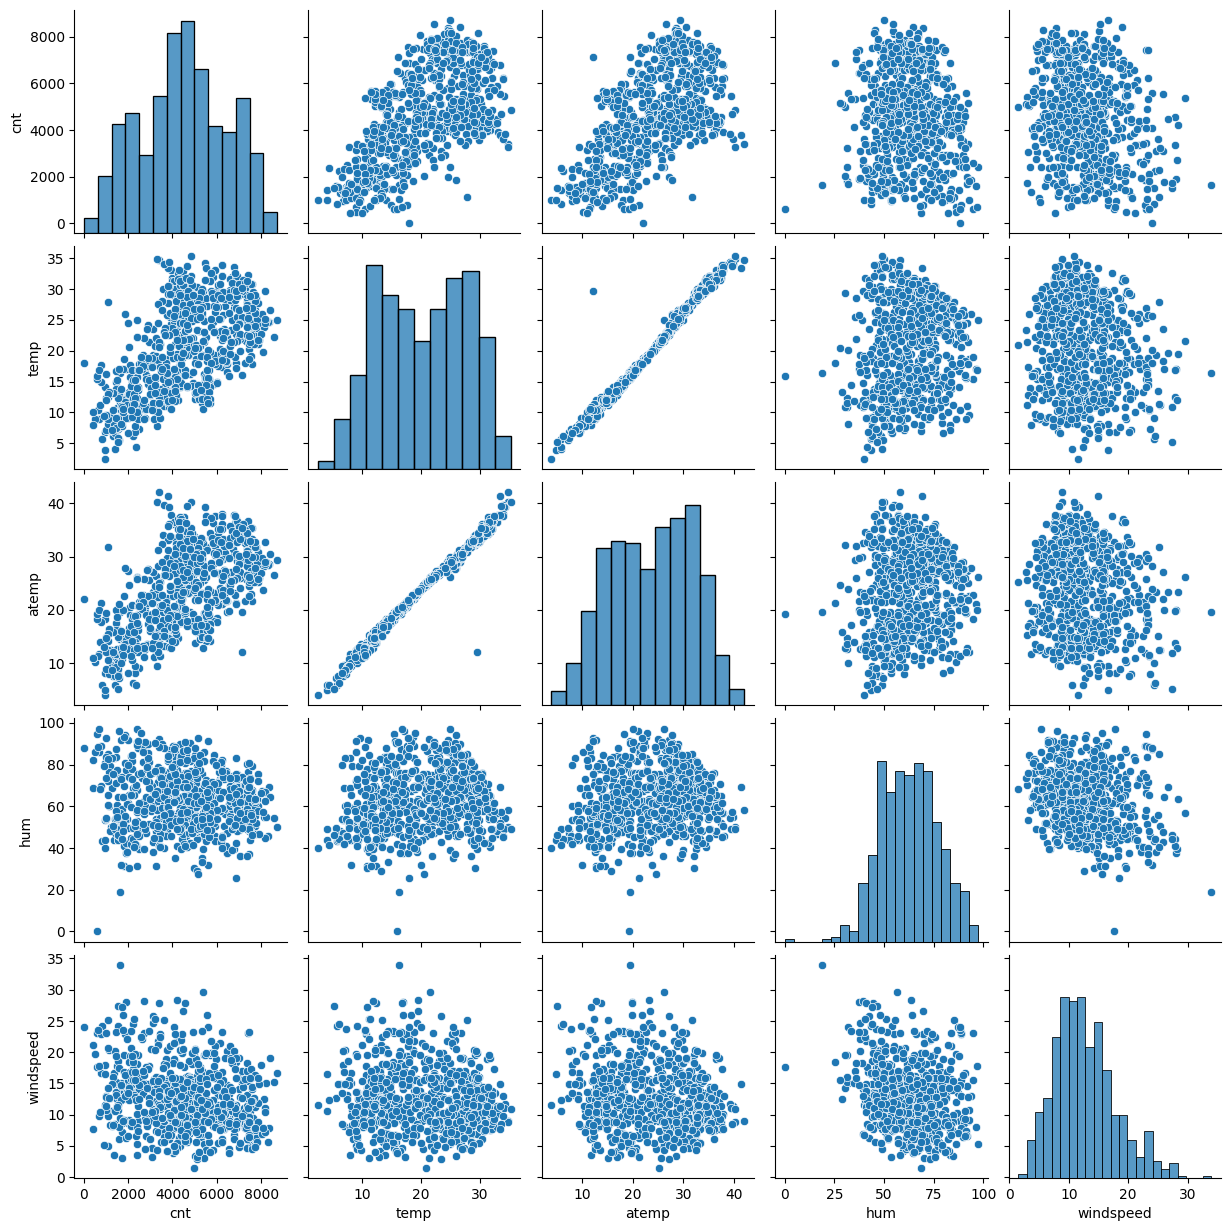

In [112]:
plt.figure(figsize = (18,36))
sns.pairplot(data = dif1, vars = ['cnt','temp','atemp', 'hum', 'windspeed'])
plt.show()

In [113]:
## we can clearly seen that the temp and atemp has the highest corelation with the target variable cnt.

<Figure size 2000x1600 with 0 Axes>

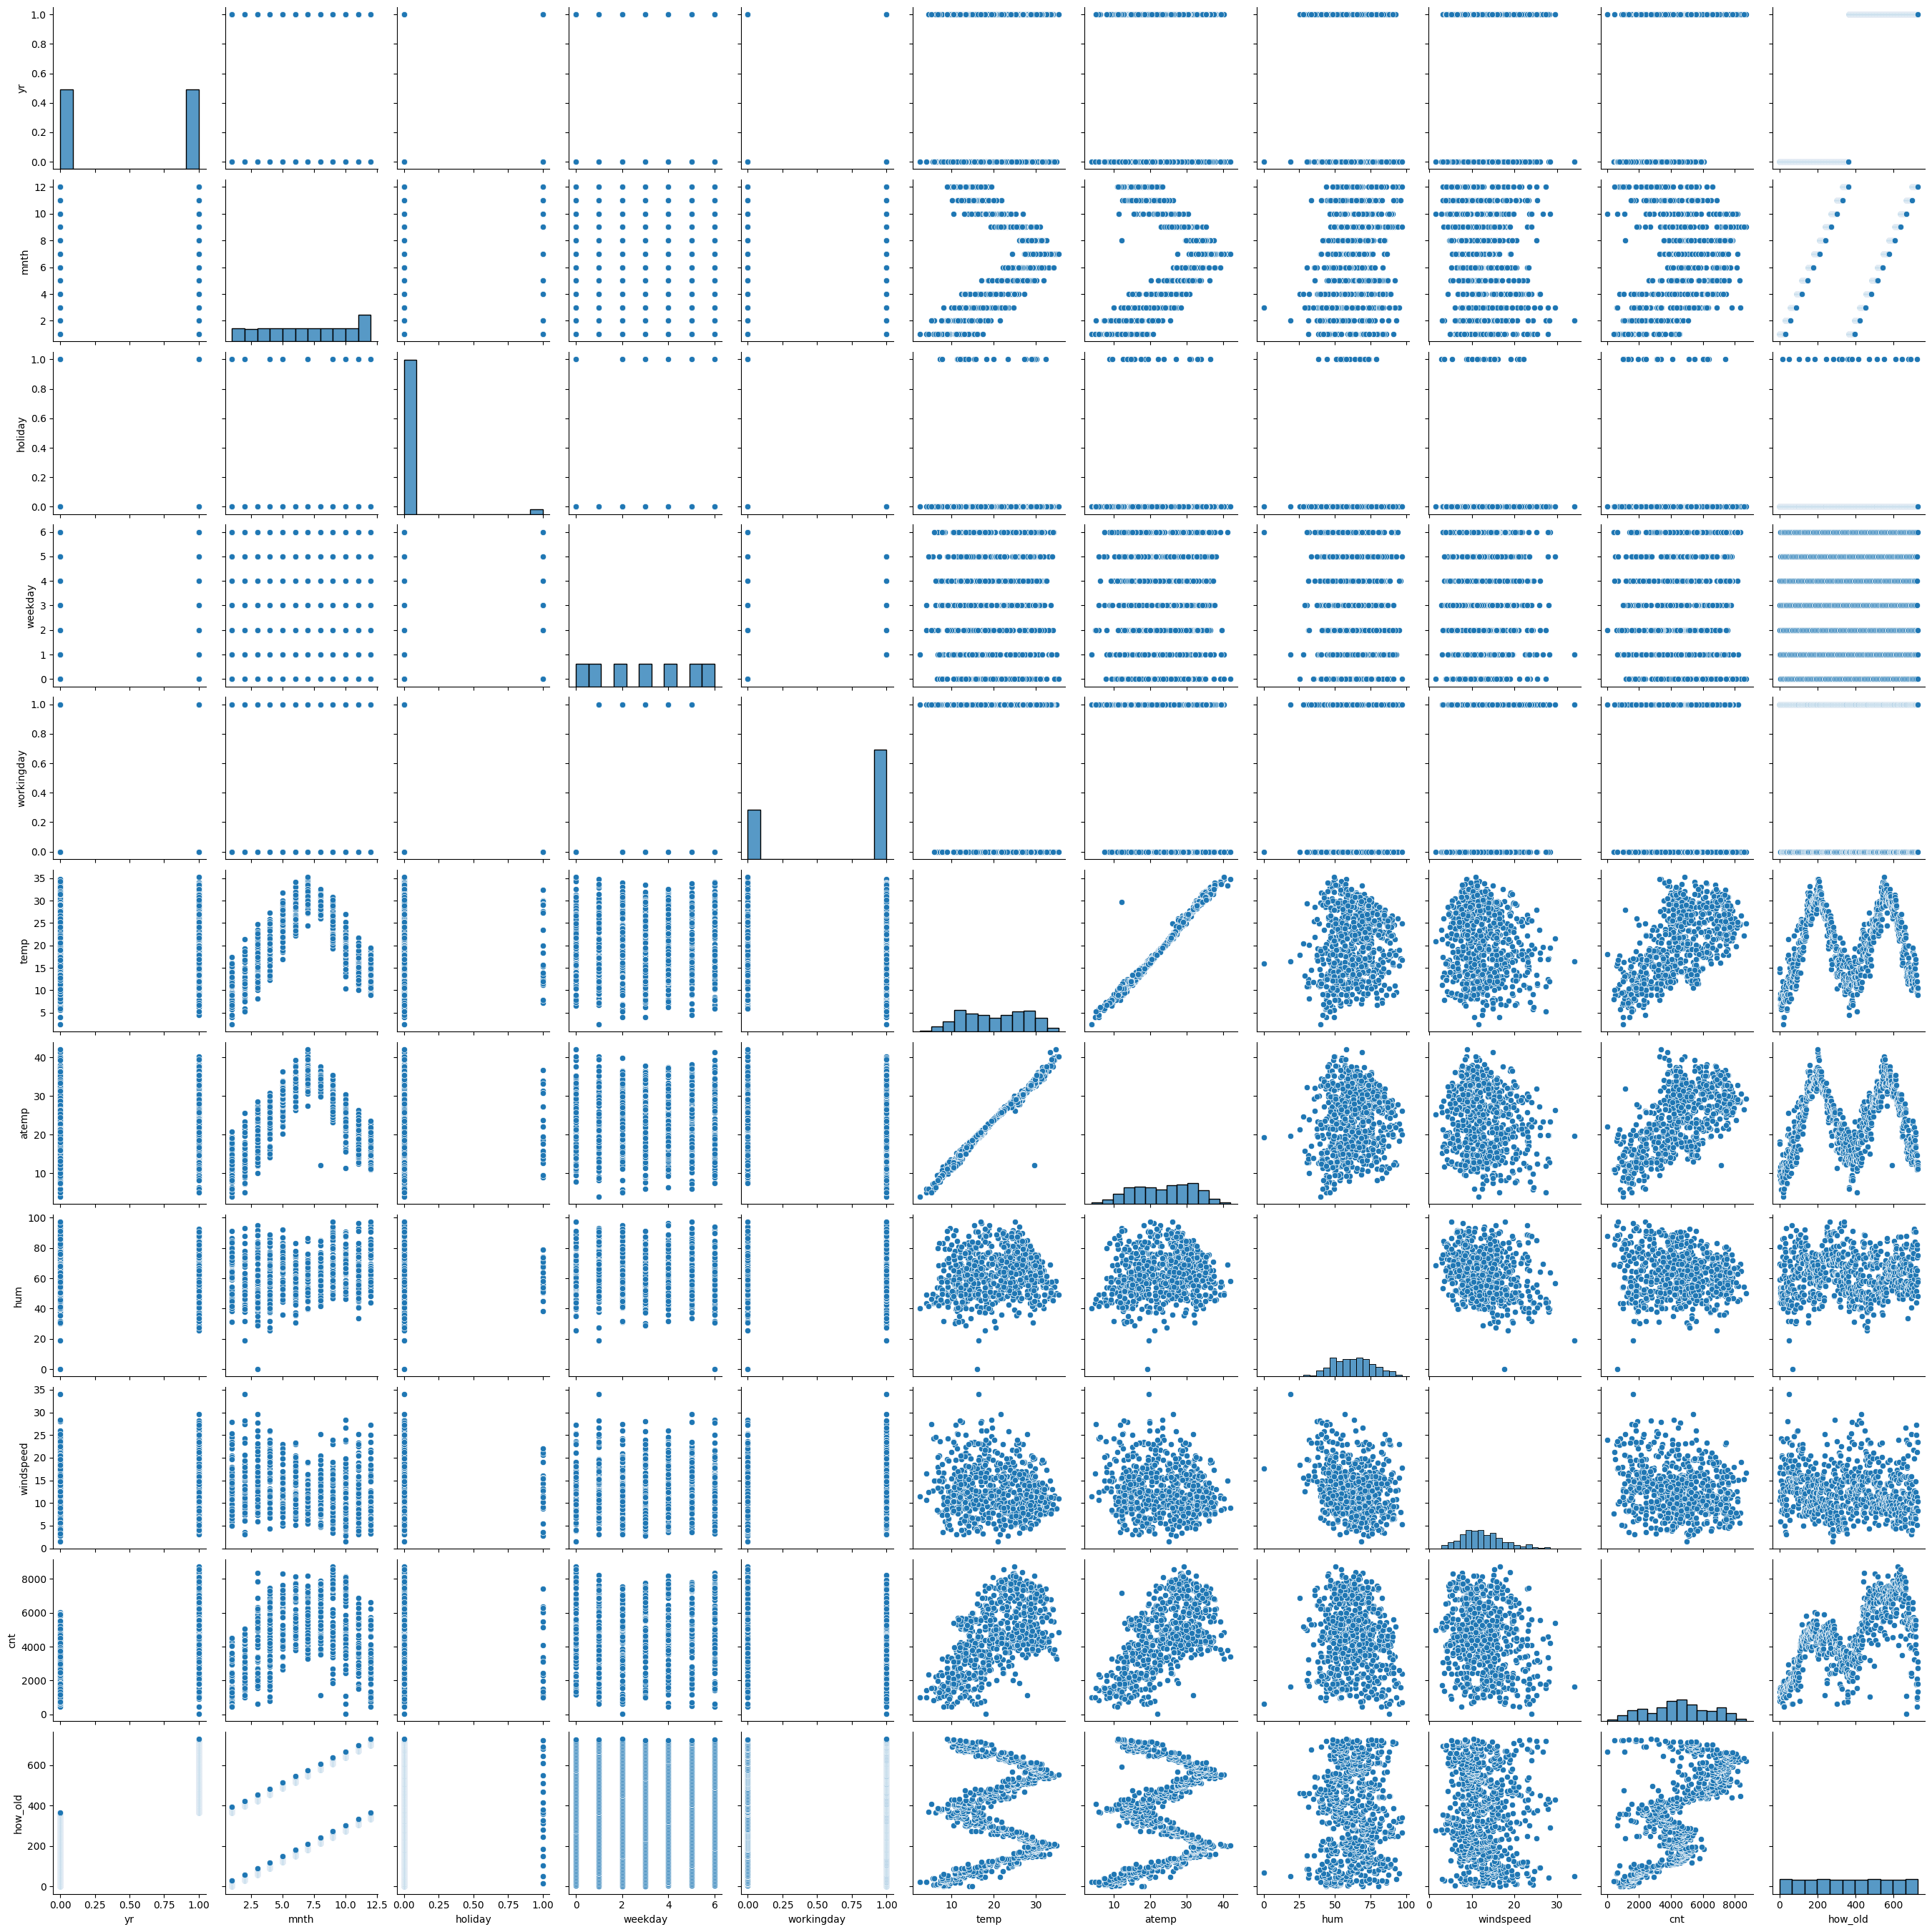

In [114]:
plt.figure(figsize = (20, 16))
sns.pairplot(dif1)
plt.show()

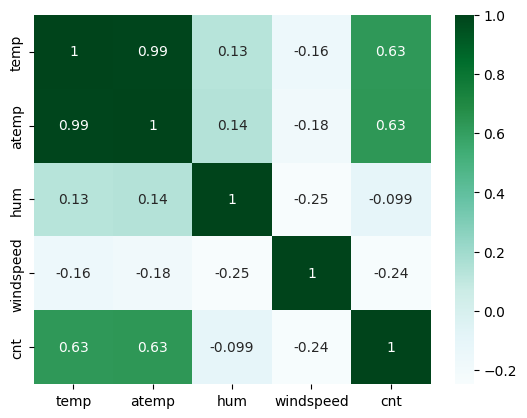

In [115]:
sns.heatmap(dif1[['temp','atemp','hum','windspeed','cnt']].corr(), cmap = 'BuGn', annot = True)
plt.show()

In [116]:
#plt.figure(figsize=(8,7), dpi = 110)
#plt.title("cnt vs Temp", fontsize = 16)

<Axes: xlabel='temp', ylabel='cnt'>

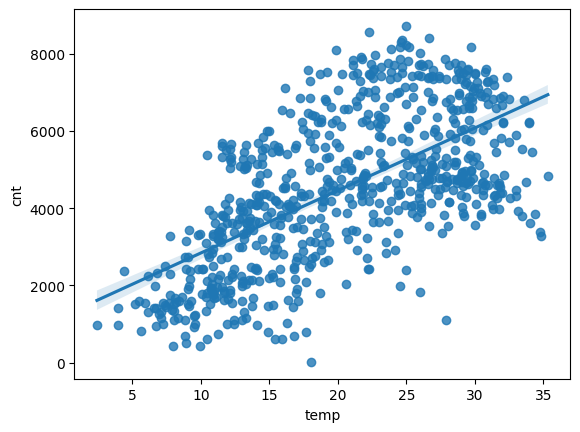

In [117]:
sns.regplot(x="temp", y="cnt", data = dif1)

<Axes: xlabel='atemp', ylabel='cnt'>

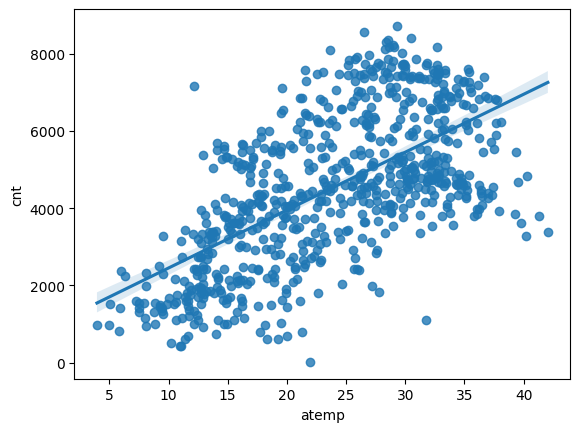

In [118]:
sns.regplot(x="atemp", y="cnt", data = dif1)

<Axes: xlabel='hum', ylabel='cnt'>

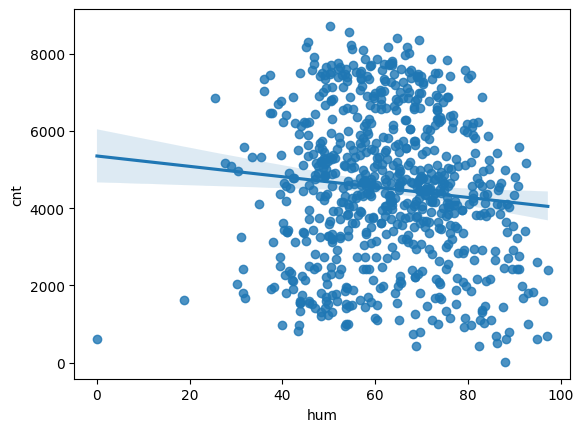

In [119]:
sns.regplot(data = dif1, x = "hum", y = "cnt")

<Axes: xlabel='windspeed', ylabel='cnt'>

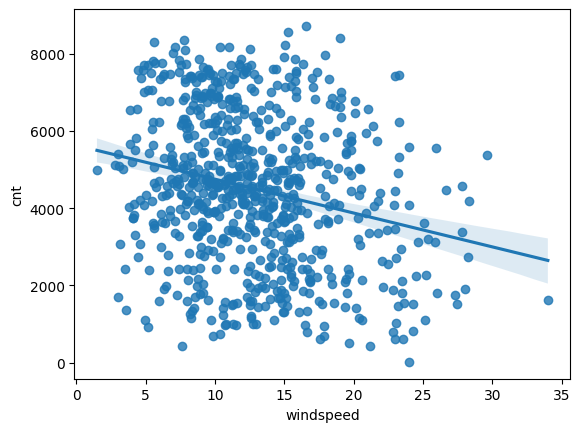

In [120]:
sns.regplot(data = dif1, x = "windspeed", y= "cnt")

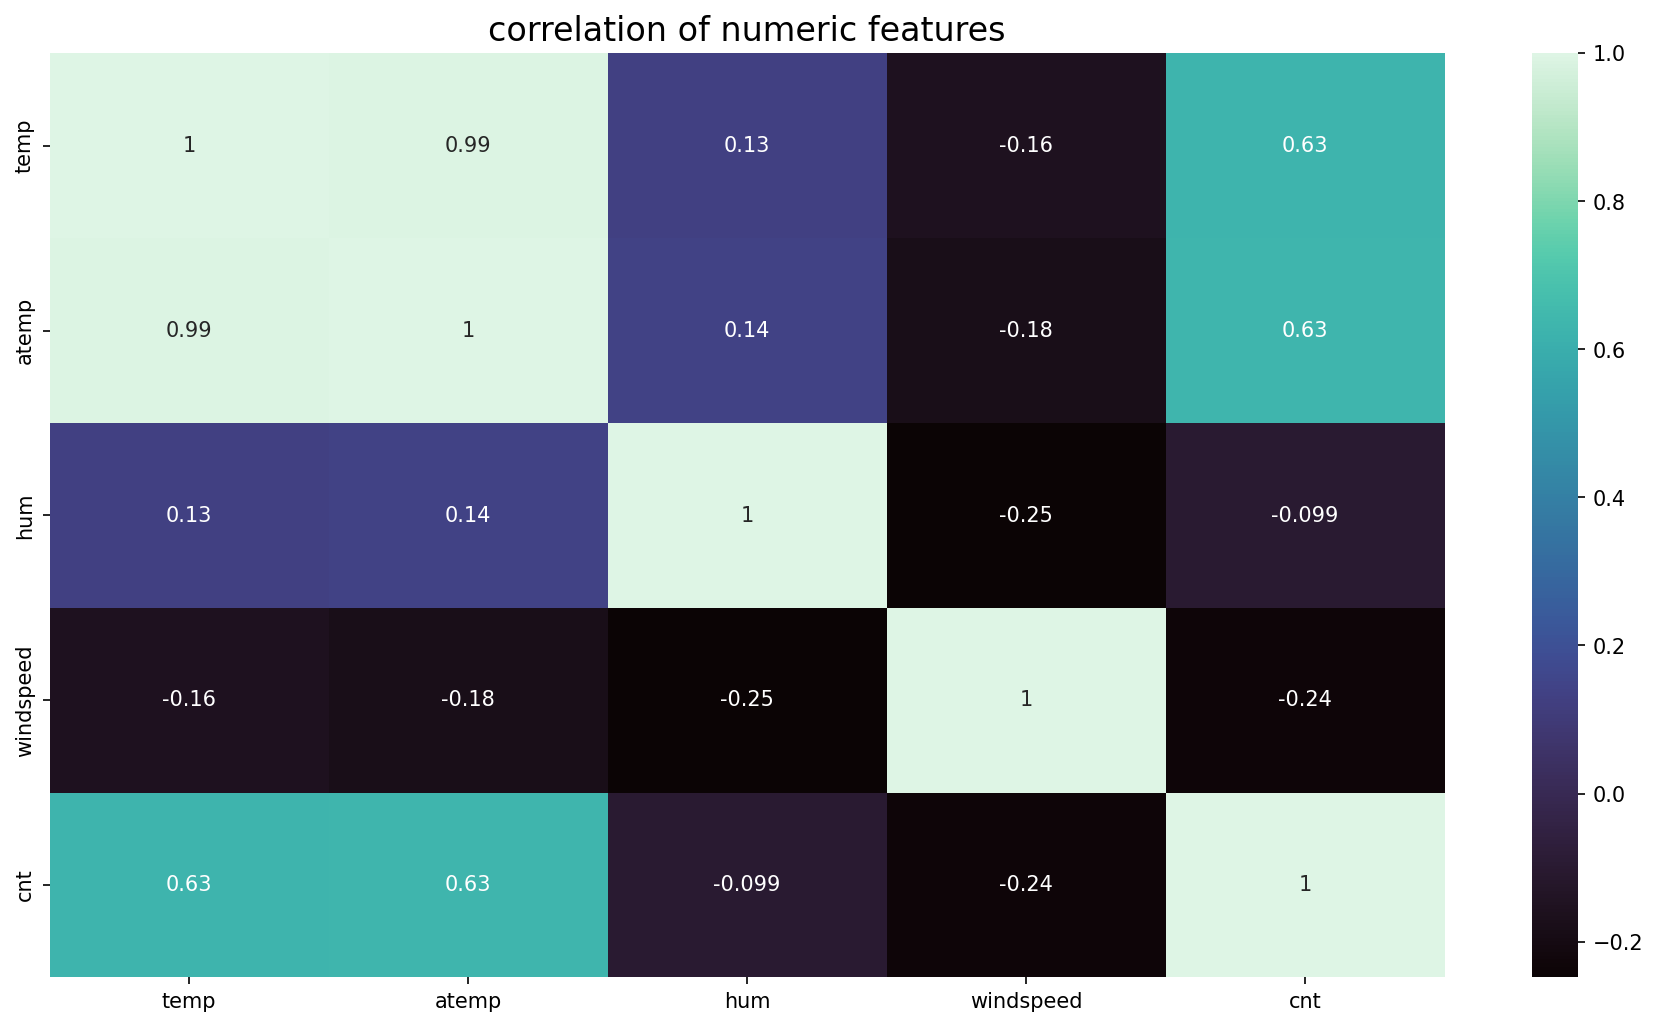

In [121]:
num1 = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize = (15,8), dpi = 150)
plt.title("correlation of numeric features", fontsize = 16)
sns.heatmap(dif1[num1].corr(), annot = True, cmap = "mako")
plt.show()

In [122]:
dif1.describe()

yr        mnth     holiday     weekday  workingday        temp   
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  \
mean     0.500000    6.526027    0.028767    2.995890    0.690411   20.319259   
std      0.500343    3.450215    0.167266    2.000339    0.462641    7.506729   
min      0.000000    1.000000    0.000000    0.000000    0.000000    2.424346   
25%      0.000000    4.000000    0.000000    1.000000    0.000000   13.811885   
50%      0.500000    7.000000    0.000000    3.000000    1.000000   20.465826   
75%      1.000000   10.000000    0.000000    5.000000    1.000000   26.880615   
max      1.000000   12.000000    1.000000    6.000000    1.000000   35.328347   

            atemp         hum   windspeed          cnt     how_old  
count  730.000000  730.000000  730.000000   730.000000  730.000000  
mean    23.726322   62.765175   12.763620  4508.006849  364.500000  
std      8.150308   14.237589    5.195841  1936.011647  210.877136  
min      3.953480    0.000000    1.500244    22.000000    0.000000  
25%     16.889713   52.000000    9.041650  3169.750000  182.250000  
50%     24.368225   62.625000   12.125325  4548.500000  364.500000  
75%     30.445775   72.989575   15.625589  5966.000000  546.750000  
max     42.044800   97.250000   34.000021  8714.000000  729.000000

In [123]:
dif1 = pd.get_dummies(data = dif1, columns = ["season","mnth", "weekday"], dtype = int, drop_first = True)

In [124]:
dif1 = pd.get_dummies(data = dif1, columns = ["weathersit"],dtype = int)

In [125]:
dif1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'how_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [126]:
dif1.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt   
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985  \
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   how_old  season_spring  ...  mnth_12  weekday_1  weekday_2  weekday_3   
0        0              1  ...        0          1          0          0  \
1        1              1  ...        0          0          1          0   
2        2              1  ...        0          0          0          1   
3        3              1  ...        0          0          0          0   
4        4              1  ...        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_bad  weathersit_good   
0          0          0          0               0                0  \
1          0          0          0               0                0   
2          0          0          0               0                1   
3          1          0          0               0                1   
4          0          1          0               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 32 columns]

# lets start building model

In [127]:
dif1.head()


yr  holiday  workingday       temp     atemp      hum  windspeed   cnt   
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985  \
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   how_old  season_spring  ...  mnth_12  weekday_1  weekday_2  weekday_3   
0        0              1  ...        0          1          0          0  \
1        1              1  ...        0          0          1          0   
2        2              1  ...        0          0          0          1   
3        3              1  ...        0          0          0          0   
4        4              1  ...        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_bad  weathersit_good   
0          0          0          0               0                0  \
1          0          0          0               0                0   
2          0          0          0               0                1   
3          1          0          0               0                1   
4          0          1          0               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 32 columns]

In [128]:
dif1.shape

(730, 32)

In [129]:
##lets split the data into training and test.

In [130]:
y = dif1.pop("cnt")

In [131]:
X = dif1

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

In [133]:
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  how_old   
0   0        0           1  14.110847  18.18125  80.5833  10.749882        0  \
1   0        0           1  14.902598  17.68695  69.6087  16.652113        1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703        2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832        3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300        4   

   season_spring  season_summer  ...  mnth_12  weekday_1  weekday_2   
0              1              0  ...        0          1          0  \
1              1              0  ...        0          0          1   
2              1              0  ...        0          0          0   
3              1              0  ...        0          0          0   
4              1              0  ...        0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weathersit_bad   
0          0          0          0          0               0  \
1          0          0          0          0               0   
2          1          0          0          0               0   
3          0          1          0          0               0   
4          0          0          1          0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

In [134]:

X_test.shape

(219, 31)

In [135]:
X_train.shape

(511, 31)

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
int_vars  = ["temp","atemp", "hum", "windspeed","how_old"]
scaler = MinMaxScaler()

X_train[int_vars] = scaler.fit_transform(X_train[int_vars])
X_train.describe()

yr     holiday  workingday        temp       atemp         hum   
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000  \
mean     0.520548    0.027397    0.698630    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.459303    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed     how_old  season_spring  season_summer  ...     mnth_12   
count  511.000000  511.000000     511.000000     511.000000  ...  511.000000  \
mean     0.414873    0.512409       0.230920       0.258317  ...    0.074364   
std      0.185619    0.292268       0.421834       0.438138  ...    0.262619   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.281934    0.254458       0.000000       0.000000  ...    0.000000   
50%      0.384732    0.521262       0.000000       0.000000  ...    0.000000   
75%      0.526481    0.770233       0.000000       1.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

        weekday_1   weekday_2   weekday_3   weekday_4   weekday_5   weekday_6   
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000  \
mean     0.148728    0.156556    0.133072    0.135029    0.150685    0.142857   
std      0.356169    0.363738    0.339986    0.342090    0.358092    0.350270   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit_bad  weathersit_good  weathersit_moderate  
count      511.000000       511.000000           511.000000  
mean         0.029354         0.624266             0.346380  
std          0.168963         0.484786             0.476282  
min          0.000000         0.000000             0.000000  
25%          0.000000         0.000000             0.000000  
50%          0.000000         1.000000             0.000000  
75%          0.000000         1.000000             1.000000  
max          1.000000         1.000000             1.000000  

[8 rows x 31 columns]

In [138]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   
683   1        0           1  0.327133  0.322150  0.639330   0.327101  \
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

      how_old  season_spring  season_summer  ...  mnth_12  weekday_1   
683  0.936900              0              0  ...        0          0  \
645  0.884774              0              0  ...        0          0   
163  0.223594              0              1  ...        0          0   
360  0.493827              1              0  ...        1          0   
640  0.877915              0              0  ...        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_bad   
683          0          0          0          1          0               0  \
645          1          0          0          0          0               0   
163          0          1          0          0          0               0   
360          0          0          1          0          0               0   
640          0          0          1          0          0               0   

     weathersit_good  weathersit_moderate  
683                0                    1  
645                0                    1  
163                1                    0  
360                0                    1  
640                0                    1  

[5 rows x 31 columns]

In [139]:
#lr = linearRegression()
#lr.fit(X_train,y_train)

In [140]:
#create first model
lr = sm.OLS(y_train, X_train)

#fit
lr_model = lr.fit()

#params
lr_model.params

yr                     3706.248307
holiday                -591.043312
workingday              -43.376097
temp                   1319.313871
atemp                  2439.667053
hum                   -1329.568456
windspeed              -923.863545
how_old               -3493.479099
season_spring         -1210.642844
season_summer            98.421957
season_winter           618.687047
mnth_2                  247.030607
mnth_3                  698.518132
mnth_4                  418.303679
mnth_5                  839.126211
mnth_6                  769.561978
mnth_7                  536.535378
mnth_8                  978.045144
mnth_9                 1794.333316
mnth_10                1640.601622
mnth_11                1036.880368
mnth_12                1279.664848
weekday_1              -301.751343
weekday_2              -221.532338
weekday_3              -220.374209
weekday_4               -30.946121
weekday_5               -40.510672
weekday_6               -60.497147
weathersit_bad      

In [141]:
from sklearn.feature_selection import RFE

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lr  = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [145]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 17),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('how_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 2),
 ('mnth_6', False, 5),
 ('mnth_7', True, 1),
 ('mnth_8', False, 6),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 4),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 12),
 ('weekday_4', False, 15),
 ('weekday_5', False, 14),
 ('weekday_6', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [146]:
##function to build a model
def model1(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [147]:
##function to find VIF value
def vif1(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [148]:
X_train.columns[rfe.support_] ##support

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'how_old',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [149]:
#rfe not selected
X_train.columns[~rfe.support_] ##not support

Index(['workingday', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_moderate'],
      dtype='object')

In [150]:
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'how_old',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']]

In [151]:
X_train_rfe.shape

(511, 15)

# 1model 

In [152]:
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'how_old',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.6
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.37e-186
Time:                        14:03:02   Log-Likelihood:                -4122.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     495   BIC:                             8345.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2861.7989    342.922     

<Axes: >

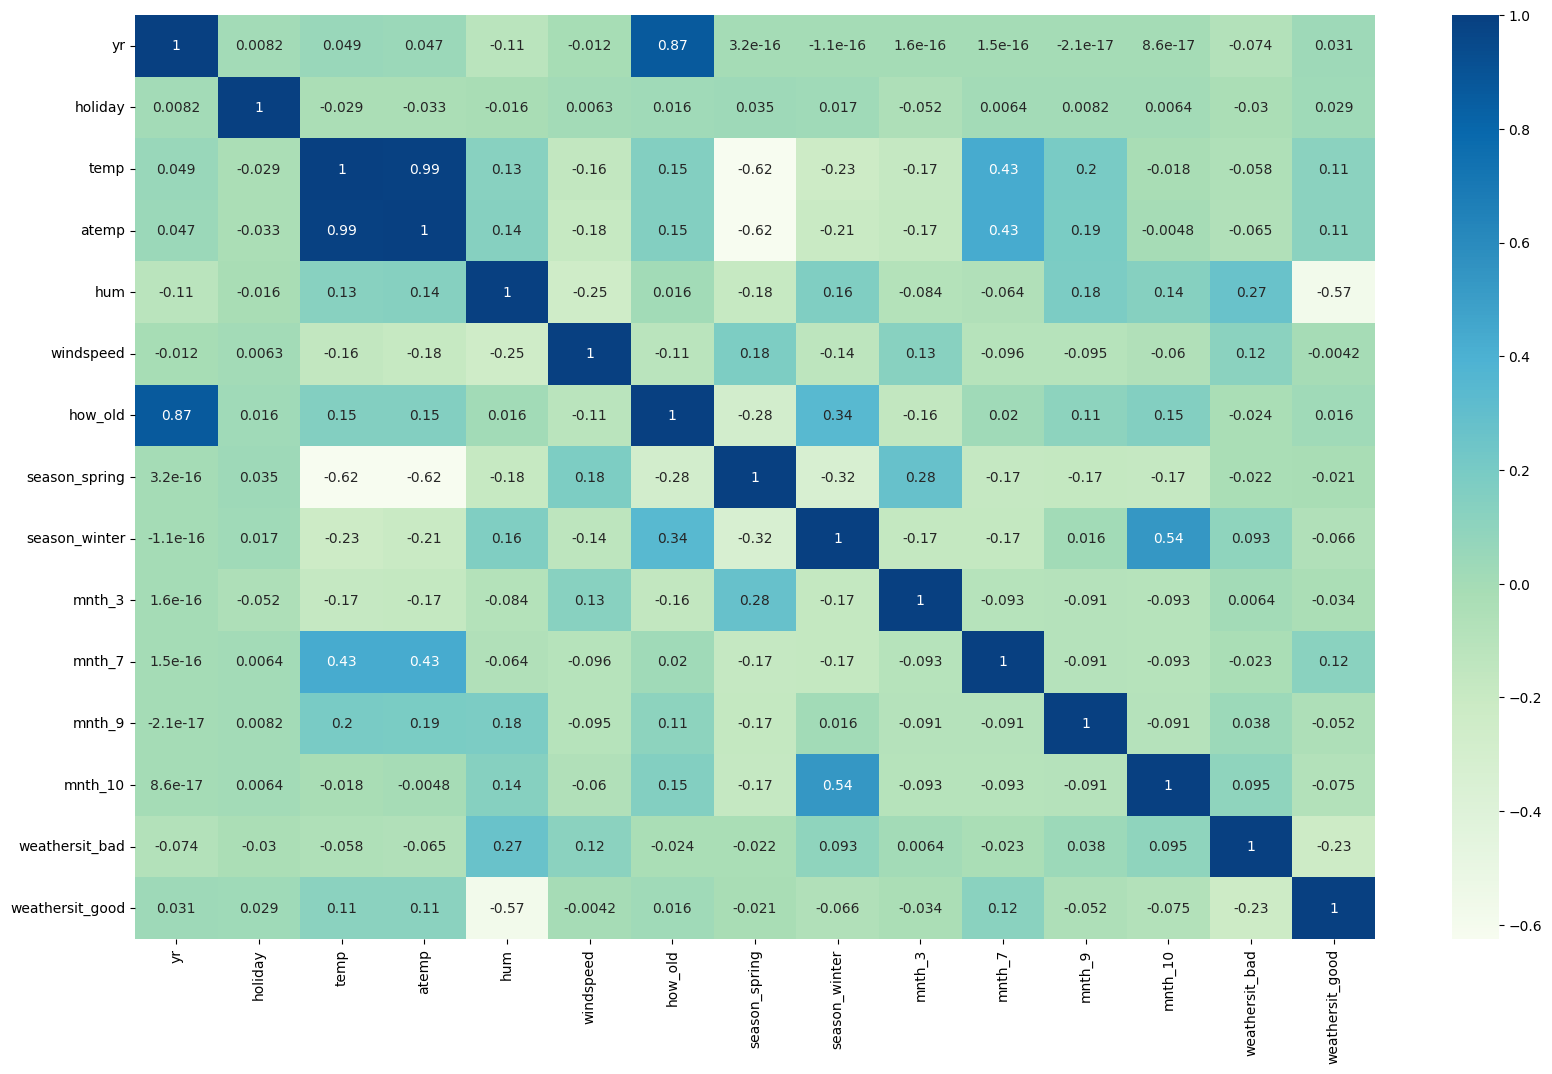

In [74]:
plt.figure(figsize = (20, 12))
sns.heatmap(dif1[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'how_old',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']].corr(), cmap ="GnBu", annot = True)

# 2 model

In [153]:
## dropping the how_old 
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          4.37e-186
Time:                        14:03:27   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2726.4615    341.697     

# 3 model

In [154]:
## dropping the atemp 
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          4.37e-186
Time:                        14:03:49   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2726.4615    341.697     

# model 4

In [155]:
cols = ['yr', 'holiday', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          6.02e-157
Time:                        14:04:16   Log-Likelihood:                -4201.3
No. Observations:                 511   AIC:                             8429.
Df Residuals:                     498   BIC:                             8484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4752.2906    350.529     

# model 5

In [156]:
##dropping humidity
cols = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_3', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          2.91e-157
Time:                        14:04:34   Log-Likelihood:                -4203.2
No. Observations:                 511   AIC:                             8430.
Df Residuals:                     499   BIC:                             8481.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4130.3422    137.953     

# model 6

In [206]:
##lets drop month 3 as well it is insignifanct value is negative.
cols = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']
model1(cols)
vif1(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.35e-156
Time:                        15:12:25   Log-Likelihood:                -4207.5
No. Observations:                 511   AIC:                             8437.
Df Residuals:                     500   BIC:                             8484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4180.0633    137.894     

# Residual Analysis

In [167]:
y_train_pred =  lr_model.predict(X_train)

In [169]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

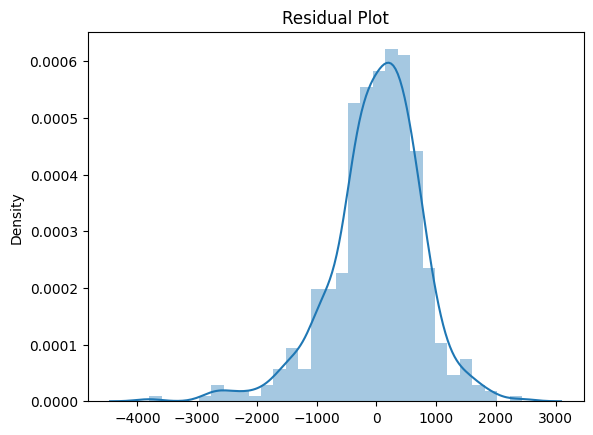

In [170]:
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

In [ ]:
##errors are normally distributed here with mean 0.

In [175]:
r2_score(y_train, y_train_pred)

0.8470377753934633

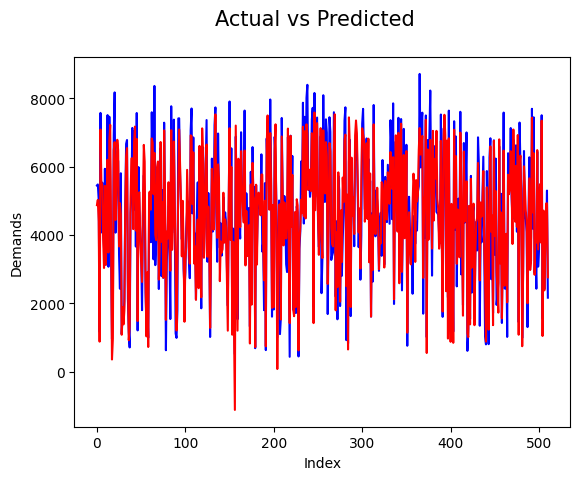

In [176]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

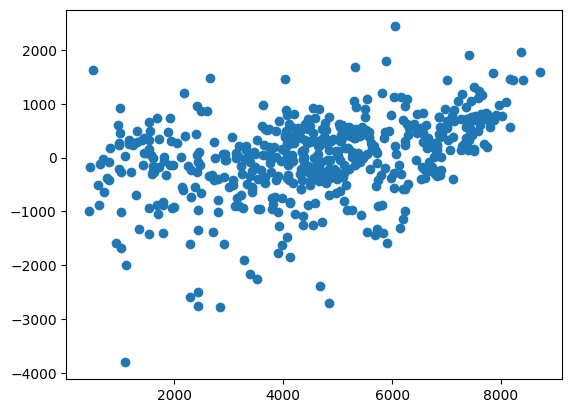

In [178]:
##linearity check
plt.scatter(y_train, res)
plt.show

# Test prdict 

In [201]:
y_test_pred = lr_model.predict(X_test)
y_test_pred

468    7207.884015
148    3657.561903
302    4979.274085
355    2502.884936
515    7544.836107
          ...     
332    4075.582757
532    7214.029658
558    6676.671202
137    3348.014367
314    4049.400919
Length: 219, dtype: float64

In [203]:
r2_score(y_true = y_train ,y_pred = y_train_pred)

0.8470377753934633

In [209]:
num_vars = ['temp','atemp','hum','windspeed','how_old']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
col = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']

y_test_pred = lr.predict(X_test[cols])

In [ ]:
## test_predicted r2 we got is around 0.78 

In [214]:
##making Prediction
dif1.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  how_old   
0   0        0           1  14.110847  18.18125  80.5833  10.749882        0  \
1   0        0           1  14.902598  17.68695  69.6087  16.652113        1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703        2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832        3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300        4   

   season_spring  season_summer  ...  mnth_12  weekday_1  weekday_2   
0              1              0  ...        0          1          0  \
1              1              0  ...        0          0          1   
2              1              0  ...        0          0          0   
3              1              0  ...        0          0          0   
4              1              0  ...        0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weathersit_bad   
0          0          0          0          0               0  \
1          0          0          0          0               0   
2          1          0          0          0               0   
3          0          1          0          0               0   
4          0          0          1          0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

In [216]:
cols = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_7', 'mnth_9',
       'mnth_10', 'weathersit_bad', 'weathersit_good']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.35e-156
Time:                        15:31:24   Log-Likelihood:                -4207.5
No. Observations:                 511   AIC:                             8437.
Df Residuals:                     500   BIC:                             8484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4180.0633    137.894     

Analysing the above model 
- company should expand their bussiness both winter and spring.
- company should focus on expanding their business during july.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.